In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from database.connection_manager import ConnectionManager
from data.company_data_manager import CompanyDataManager
from data.market_cap_updater import MarketCapUpdater
from analysis.returns_calculator import ReturnsCalculator
from analysis.stock_analyzer import StockAnalyzer
from analysis.sharpe_ratio_calculator import SharpeRatioCalculator
from analysis.correlation_calculator import CorrelationCalculator
from network.correlation_network import CorrelationNetworkGraph
from network.visualizer import NetworkVisualizer



In [2]:
# 1. Market Overview
company_mgr = CompanyDataManager()
tickers=company_mgr.get_ordered_tickers()

#first 5 tickers
print("tickers of first 5 stocks")
print(tickers[0:5])



New database connection created
tickers of first 5 stocks
['NVDA', 'MSFT', 'AAPL', 'GOOG', 'GOOGL']


In [3]:
sector_ticker_dict=company_mgr.get_sector_dict()
#Sectors of first 10 tickers
c=0
print("sectors of first 10 tickers")
for key,val in sector_ticker_dict.items():
    c+=1
    print(key,end=": ")
    print(val, "USD")
    if c>=10:
        break      
    

sectors of first 10 tickers
MMM: Industrials USD
AOS: Industrials USD
ABT: Health Care USD
ABBV: Health Care USD
ACN: Information Technology USD
ADBE: Information Technology USD
AMD: Information Technology USD
AES: Utilities USD
AFL: Financials USD
A: Health Care USD


In [4]:
market_cap_dict=company_mgr.get_market_cap_dict()
#Market cap for first 10 stocks
c=0
print("Market cap of 10 stocks")
for key,val in market_cap_dict.items():
    c+=1
    print(key,end=": ")
    print(val, "USD")
    if c>=10:
        break      
    

Market cap of 10 stocks
MMM: 81428430848.0 USD
AOS: 9771236352.0 USD
ABT: 232020590592.0 USD
ABBV: 407527325696.0 USD
ACN: 156768878592.0 USD
ADBE: 145450942464.0 USD
AMD: 377944047616.0 USD
AES: 10374561792.0 USD
AFL: 59457216512.0 USD
A: 39721242624.0 USD


In [5]:
industry_dict=company_mgr.get_industry_dict()
#Industry of  10 tickers
c=0
print("Industry cap of 10 stocks")
for key,val in industry_dict.items():
    c+=1
    print(key,end=": ")
    print(val, "USD")
    if c>=10:
        break      
    


Industry cap of 10 stocks
MMM: Industrial Conglomerates USD
AOS: Building Products USD
ABT: Health Care Equipment USD
ABBV: Biotechnology USD
ACN: IT Consulting & Other Services USD
ADBE: Application Software USD
AMD: Semiconductors USD
AES: Independent Power Producers & Energy Traders USD
AFL: Life & Health Insurance USD
A: Life Sciences Tools & Services USD


In [6]:
ticker_name=company_mgr.get_ticker_name_dict()
#APPL ticker name
print(ticker_name["AAPL"])
#Industry of  10 tickers
c=0
print("Name of 10 tickers")
for key,val in ticker_name.items():
    c+=1
    print(key,end=": ")
    print(val, "USD")
    if c>=10:
        break      
    

Apple Inc.
Name of 10 tickers
MMM: 3M USD
AOS: A. O. Smith USD
ABT: Abbott Laboratories USD
ABBV: AbbVie USD
ACN: Accenture USD
ADBE: Adobe Inc. USD
AMD: Advanced Micro Devices USD
AES: AES Corporation USD
AFL: Aflac USD
A: Agilent Technologies USD


In [7]:
sector_ticker=company_mgr.get_sector_tickers_dict()
#list of sectors
for key,val in sector_ticker.items():
    print(key)


Industrials
Health Care
Information Technology
Utilities
Financials
Materials
Consumer Discretionary
Real Estate
Communication Services
Consumer Staples
Energy


In [8]:
# 2. Returns Performance Heatmap
returns_calc = ReturnsCalculator()
returns_df = returns_calc.calculate_returns()
#Returns table 
print(returns_df.tail())


Returning existing database connection
         NVDA      MSFT      AAPL      GOOG     GOOGL      AMZN      META  \
359  0.881219 -0.763894  0.657666  0.362466  0.322584  0.806780  1.353606   
360 -0.672351  0.312170  0.346122  0.008118 -0.138384 -1.303902 -2.268068   
361 -1.108625  2.168751 -0.515459  2.053154  2.070506  0.633228  0.717740   
362 -0.269484 -0.868386 -0.081807 -1.741477 -1.864792  0.398373 -0.360500   
363  2.199528  0.166036  0.616027 -0.675757 -0.463867  1.551088  0.667528   

         AVGO      TSLA     BRK-B  ...       CRL       APA       FRT  \
359  1.436749 -5.105992 -0.457647  ...  2.862509 -4.708700 -0.632273   
360  0.056184 -1.415141  0.570654  ...  1.123404  2.763827  0.404001   
361 -0.851141  5.448669  0.254634  ... -1.342133  2.363488 -0.673982   
362  0.274230 -4.447877  0.455982  ... -2.772215 -0.159239 -1.154547   
363  2.702059  1.293035 -0.489745  ...  1.981185 -1.913874 -0.051225   

         EPAM      HSIC      MTCH       LKQ       MHK       EMN  

In [9]:
analyzer = StockAnalyzer(returns_df)
# Top performers (momentum strategy)
top_momentum = analyzer.topk_stocks(30, 10)
c=0
for key,value in top_momentum:
    c+=1
    print(value,key,"%")
    if c>=10:
        break

Returning existing database connection
MU 54.17674626975108 %
WBD 47.2929737770751 %
INTC 46.636861440487856 %
WDC 43.69001606396746 %
AMD 38.30549686395286 %
HOOD 35.361007406472666 %
LRCX 33.13678163210288 %
STX 32.24779798899013 %
APP 32.16202339368272 %
CNC 30.796773079233347 %


In [10]:
worst_performer = analyzer.leastk_stocks(30, 10)
c=0
for key,value in worst_performer:
    c+=1
    print(value,key,"%")
    if c>=10:
        break

FDS -28.9121765408193 %
KMX -26.781744163062875 %
KVUE -24.48977606729869 %
DLTR -23.350464625543978 %
HRL -17.43198545525083 %
MGM -16.88189874335186 %
SBAC -15.049927987712952 %
CTVA -14.888808288214857 %
LYB -14.598135446253922 %
RCL -13.356203179670203 %


In [11]:
#Analyize "FDS" ticker in different time periods
performance_over_multiple_periods = analyzer.analyze_multiple_periods("FDS", [10,30,50])
for key,value in performance_over_multiple_periods.items():
    print("FDS returns in",key," days: ",value,"%")


FDS returns in 10  days:  -1.5529043422917947 %
FDS returns in 30  days:  -28.9121765408193 %
FDS returns in 50  days:  -37.55889534886041 %


In [12]:
# Sharpe ratio ranking (risk-adjusted returns) over a year
sharpe_calc = SharpeRatioCalculator(returns_df, tickers)
top_sharpe = sharpe_calc.get_top_sharpe_stocks(10)
print("Sharpe ratio of top 10 stocks")
for key,value in top_sharpe:
    print(key,": ",value)

Sharpe ratio of top 10 stocks
PLTR :  2.549391344447162
HOOD :  2.476316154173293
GLW :  2.3477000291841104
APP :  2.2219381303046477
HWM :  2.200946769989356
GEV :  2.15374034742003
WELL :  2.093826332872782
TPR :  2.0430284023617875
BK :  2.0397531775039974
NFLX :  1.9081182867994542


In [13]:
# 4. Correlation Network Visualization
corr_calc = CorrelationCalculator(returns_df)
# Correlation Matrix of last 45 days
corr_matrix_45days = corr_calc.calculate_correlation_matrix(45)
# printing correlation matrix
print(corr_matrix_45days)

           NVDA      MSFT      AAPL      GOOG     GOOGL      AMZN      META  \
NVDA   1.000000  0.285834  0.131495  0.035389  0.045028  0.175765  0.106916   
MSFT   0.285834  1.000000  0.034510  0.251391  0.253133  0.219528  0.262720   
AAPL   0.131495  0.034510  1.000000  0.358606  0.355445  0.316081  0.143690   
GOOG   0.035389  0.251391  0.358606  1.000000  0.999037  0.246986  0.363783   
GOOGL  0.045028  0.253133  0.355445  0.999037  1.000000  0.255727  0.365703   
...         ...       ...       ...       ...       ...       ...       ...   
MTCH  -0.146613 -0.155556  0.255919  0.172674  0.164947  0.400223  0.262901   
LKQ   -0.036658 -0.089019  0.074368  0.057514  0.053269  0.261069  0.028796   
MHK    0.074054 -0.049527  0.142573  0.204080  0.206541  0.330167  0.267937   
EMN   -0.143827 -0.130535  0.066153 -0.099493 -0.096578  0.257613  0.234285   
KMX   -0.010004  0.105200 -0.019151  0.215971  0.218703  0.287169  0.195009   

           AVGO      TSLA     BRK-B  ...       CRL 

In [14]:
#get topk similar stocks based on correlation matrix for GOOG
topk_similar_stocks=corr_calc.get_topk_similar_stocks(corr_matrix_45days,"GOOG",5)
print(topk_similar_stocks)

[('GOOGL', 0.9990370158057115), ('CPB', 0.45861514868131864), ('EXPE', 0.39143678869100634), ('META', 0.36378345633756637), ('AAPL', 0.35860580840953843)]


In [15]:
# Find similar stocks (portfolio diversification)
network = CorrelationNetworkGraph(corr_matrix_45days, tickers, threshold=0.83)
similar_tech = network.get_similar_stocks(['GOOGL'], 5)
print(similar_tech)

{'GOOGL': [{'ticker': 'GOOG', 'correlation_strength': np.float64(0.9990370158057115)}]}


In [16]:
network.get_graph_info()

{'nodes': 503, 'edges': 134, 'threshold': 0.83}

NetworkVisualizer: 106 connected nodes, 134 edges


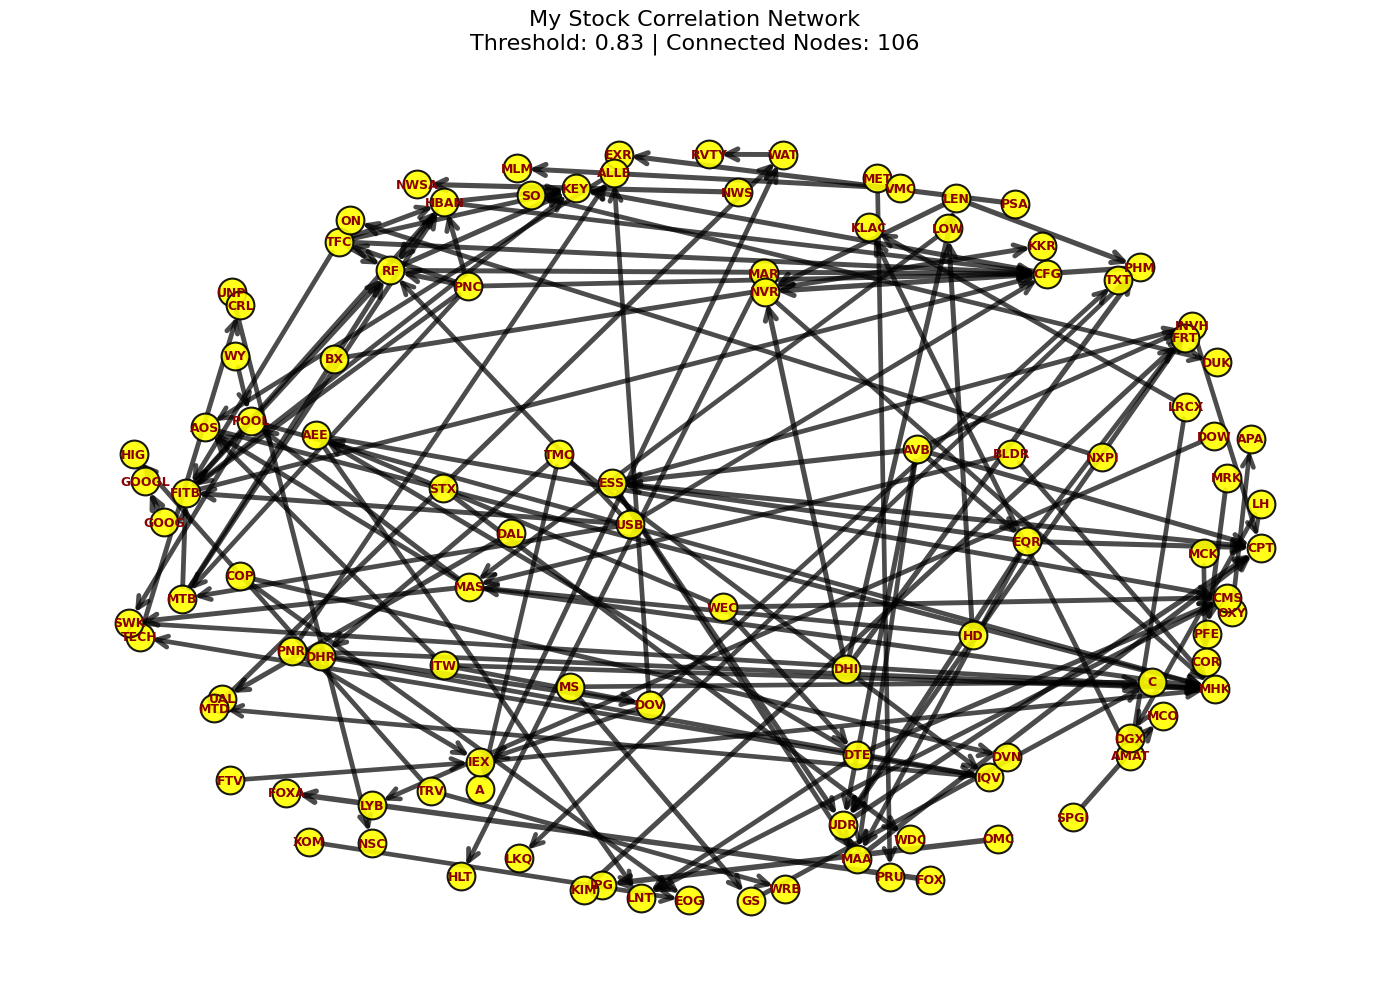

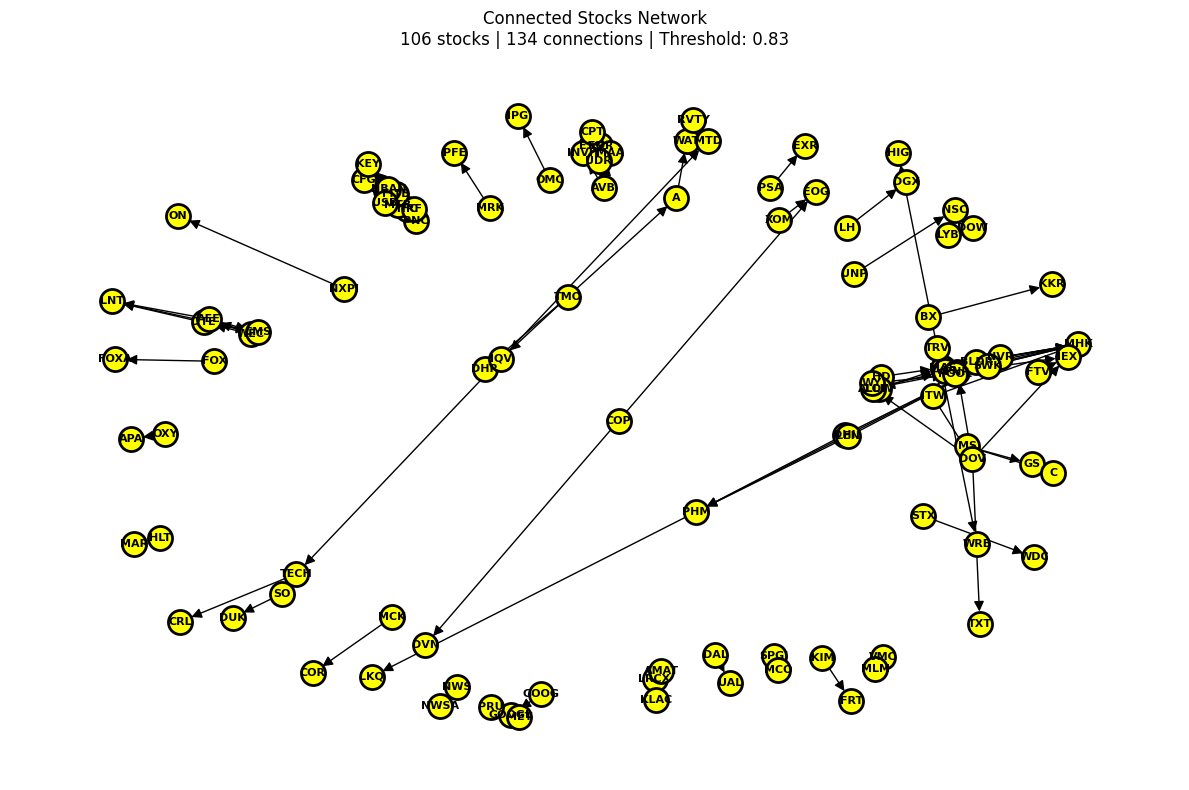

Connected: 106/503 stocks


In [17]:
visualizer = NetworkVisualizer(network)

# Plot different versions
visualizer.plot_networkx(title="My Stock Correlation Network")
visualizer.plot_interactive(title="Interactive Stock Network")
visualizer.plot_minimal()

# Get statistics
stats = visualizer.get_network_stats()
print(f"Connected: {stats['connected_nodes']}/{stats['total_nodes']} stocks")